## Criando os nomes

In [ ]:
import pandas as pd

In [ ]:
pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [ ]:
pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [ ]:
nomes_m.sample(3)

,nome,regiao,freq,rank,sexo
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
7,LUCAS,0,1116818,8,M


In [ ]:
print ('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(7)

,nome
6,PEDRO
0,MARIA
8,LUIZ
12,AMANDA
1,ANA
11,CAMILA
15,LETICIA


#Incluindo ID dos alunos

In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

40

In [ ]:
nomes["id_aluno"] = np.random.permutation(total_alunos) +1

In [ ]:
nomes.sample(3)

,nome,id_aluno
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26


In [ ]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes.sample(4)

,nome,id_aluno,dominio
14,MARCELO,23,@dominioemail.com.br
2,FRANCISCA,13,@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com
9,ALINE,21,@servicodoemail.com


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(6)

,nome,id_aluno,dominio,email
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br
0,MARIA,7,@dominioemail.com.br,maria@dominioemail.com.br
13,DANIEL,34,@dominioemail.com.br,daniel@dominioemail.com.br
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br
4,CARLOS,30,@dominioemail.com.br,carlos@dominioemail.com.br


#Criando a tebela Cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head(3)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web


#Alterando o index de Cursos

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [ ]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [ ]:
cursos['id'] = cursos.index +1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
7,FERNANDA,2,@dominioemail.com.br,fernanda@dominioemail.com.br
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com
17,LUCIANA,32,@servicodoemail.com,luciana@servicodoemail.com
13,BRUNA,8,@servicodoemail.com,bruna@servicodoemail.com


#Matriculando os alunos nos cursos

In [ ]:
nomes ['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)* 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,15,@dominioemail.com.br,pedro@dominioemail.com.br,1
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,1
8,PATRICIA,14,@dominioemail.com.br,patricia@dominioemail.com.br,1
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br,1


In [ ]:
nomes.matriculas.describe()

count    40.000000
mean      1.700000
std       0.966092
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


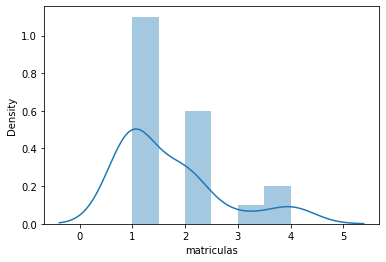

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    22
2    12
4     4
3     2
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br,1
6,PEDRO,15,@dominioemail.com.br,pedro@dominioemail.com.br,1
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com,2
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,3
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2


#Selecionando cursos

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
16,EDUARDO,18,@servicodoemail.com,eduardo@servicodoemail.com,1
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,4
1,11,16
2,13,6
3,13,11
4,39,3


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python
6,4,PHP com MySql
7,7,.NET para web
8,5,Novas integrações com Java
10,10,Código limpo com C#


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
14,MARCELO,23,@dominioemail.com.br,marcelo@dominioemail.com.br,2
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,1


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,4
1,11,16
2,13,6
3,13,11
4,39,3


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


#Saída em diferentes formatos

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,5,Novas integrações com Java
8,10,Código limpo com C#
9,7,Preparatório para certificação Java


In [ ]:
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"quantidade_de_alunos":{"1":1,"2":2,"3":6,"4":1,"5":1,"6":4,"7":7,"8":5,"10":10,"11":7,"13":5,"14":7,"15":1,"16":3,"18":6,"19":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>1</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>6</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>1</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>1</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>4</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>7</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>5</td>\n      <td>Novas integrações com Java</td>\n    </tr

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>6</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>7</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>5</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>10</td>
      <

#Criando o bando sql

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


#Buscando do banco sql

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos <3'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,1,Lógica de programação
1,2,2,Java para Web
2,4,1,Ruby on Rails
3,5,1,Cursos de Python
4,15,1,Análise de dados
5,19,2,Boas práticas em Java


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,6
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,5
8,Código limpo com C#,10
9,Preparatório para certificação Java,7


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,6
3,Ruby on Rails,1
4,Cursos de Python,1
5,PHP com MySql,4
6,.NET para web,7
7,Novas integrações com Java,5
8,Código limpo com C#,10
9,Preparatório para certificação Java,7


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 6')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
6,.NET para web,7
8,Código limpo com C#,10
9,Preparatório para certificação Java,7
11,Desenvolvendo jogos,7


#Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Nomes dos alunos da próxima turma

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,1,Lógica de programação
2,2,Java para Web
3,6,C# para Web
4,1,Ruby on Rails
5,1,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,4
1,11,16
2,13,6
3,13,11
4,39,3


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [ ]:
proxima_turma

,id_aluno,id_curso
1,11,16
36,36,16
55,33,16


In [ ]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,7,@dominioemail.com.br,maria@dominioemail.com.br,1
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
3,ANTONIA,39,@servicodoemail.com,antonia@servicodoemail.com,2
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
11,16,ANA,@servicodoemail.com,ana@servicodoemail.com,1
36,16,FRANCISCO,@servicodoemail.com,francisco@servicodoemail.com,2
33,16,RAFAEL,@servicodoemail.com,rafael@servicodoemail.com,2


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
11          ANA
36    FRANCISCO
33       RAFAEL
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
11,ANA
36,FRANCISCO
33,RAFAEL


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'